# Introduction

We use California housing prices in 1990 to make predictions for the California housing prices by creating a predictive model. According to Clark and Herrin (2000), the quality of public schools near the houses effects the prices of the houses in California, and the the quality of public school is more important then the crime and environment quality for the local residents. In this paper, we find more factors that effects the prices of the houses in California. After identifying the variables that effect the prices of the houses, we use them to create a predictive model for the California housing prices. We use the data from the 1990 California census.

To make a predictive model, we analysis median house value for households within a block (measured in US Dollars), median age of a house within a block, median income for households within a block of houses (measured in tens of thousands of US Dollars), the relationship between median house value and housing median age, and the relationship between median house value and median income. In detail, the median house value for households within a block is the outcome which is also called a dependent variable. The most common symbol for the dependent variable is $Y$. The median age of a house within a block and the median income for households within a block of houses are the predictive covariates, which are also called independent variables. The most common symbol for the independent variable is $X$. We analysis median house value, housing median age, and median income by writing the summary statistics of all three variables and plotting the histogram of all three variables.

Then, we create a map of the median house value for households within a block (measured in US Dollars) in California and a map of the median income for households within a block of houses (measured in tens of thousands of US Dollars) in California. The similarity of two maps shows the relation between two variables. If two maps look quite similar, then median house value and median income have strong positive relation, and median income is a good explanatory variable for the predictive model for median house value.

After that, we add more information to the dataset to find more predictors for the predictive model for the California housing prices. we add the area of each county in California and the California earthquake data. We use the area of each county in California and the population to calculate the population density, and then discover the relation between the population density and the median house value by creating maps and plotting scatter plot. Meanwhile, we use the number of earthquakes in each county as a new predictive covariate. We create a heatmap for the number of earthquakes in each county and compare it with the heatmap the California housing prices. For the graphs, the scatter plot shows how much one variable is affected by another, and the similarity of two maps shows the relation between two variables. If two maps look quite similar, then two variables have strong positive relation, and that predictive covariate is a good explanatory variable for the predictive model for median house value.

By the previous analysis, we already find the predictors for the predictive model for California housing prices. Then, we use Ordinary least squares (OLS) Regression and Regression Tree to fit a model based on the data of the prices of the houses and the predictors from the 1990 California census. For Ordinary least squares Regression, if F-statistic $> 10$ and p-value $=0<0.05$, we reject the null hypothesis that all coefficients are zero. For each coefficient, if t-statistic is larger than critical value of 2.5$\%$, then p-value $< 0.05$. So, that coefficient is significantly different from 0. The R-squared shows the proportion of variation in the median house value ($Y$) is explained by the predictors ($X$), so we prefer the model with high R-squared. When we add additional predictors, if the Adjusted R-squared increases, then adding additional predictors improves a regression model. For the Regression Tree, we run it using the chosen predictors and display the tree graphically. We compare the Mean Squared Error (MSE) of the linear regression model and the Regression model and choose the one with a lower MSE. In the end, we choose the best model as the result of this paper which is the predictive model for California housing prices. 

# Data

We need the data for the dependent variable and the independent variables of the predictive model to do the analysis and fit the model. We use the data from the 1990 California census. There are 20640 rows of data. We select three columns data, medianHouseValue, housingMedianAge, and medianIncome.

## Data Cleaning

We read the data and change it to a data frame format. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('housing.csv')

Then, we clean the data by selecting three columns that we would use. ($Y$ = median_house_value, $X_1$ = housing_median_age, $X_2$ = median_income)

In [2]:
clean_data = data['median_house_value']
clean_data = pd.concat([clean_data, data['housing_median_age']], axis=1)
clean_data = pd.concat([clean_data, data['median_income']], axis=1)
# Ignore any row with missing data
clean_data = clean_data.dropna().reset_index(drop=True)

# Summary Statistics

Then, we use describe() in pandas library to obtain the summary statistics of the $X$s and $Y$. ($Y$ = median_house_value, $X_1$ = housing_median_age, $X_2$ = median_income)

In [3]:
clean_data.describe() 

,median_house_value,housing_median_age,median_income
count,20640.000000,20640.000000,20640.000000
mean,206855.816909,28.639486,3.870671
std,115395.615874,12.585558,1.899822
min,14999.000000,1.000000,0.499900
25%,119600.000000,18.000000,2.563400
50%,179700.000000,29.000000,3.534800
75%,264725.000000,37.000000,4.743250
max,500001.000000,52.000000,15.000100


From the previous output, we know the following result. 

**count**

- There are 20640 rows of data for median house value, housing median age, and median income. 

**mean**

- The mean of median house value is 206855.82 US Dollars, which means that the average of the median house value for households within a block is 206855.82 US Dollars. 
- The mean of housing median age is 28.6 years, which means that the average of the median age of a house within a block is 28.6 years. 
- The mean of median income is 3.87 tens of thousands of US Dollars, which means that the average of the median income for households within a block of houses is 3.87 tens of thousands of US Dollars. 

**std**

- The standard deviation of the median house value for households within a block is 115395.62 US Dollars. 
- The standard deviation of the median age of a house within a block is 12.6 years.
- The standard deviation of the median income for households within a block of houses is 1.90 tens of thousands of US Dollars. 

**min, 25%, 50%, 75%, max**

- For the median house value for households within a block, the minimum is 14999 US Dollars, the first quantile is 119600 US Dollars, the median is 179700 US Dollars, the third quantile is 264725 US Dollars, and the maximum is 500001 US Dollars. 
- For the median age of a house within a block, the minimum is 1 year, the first quantile is 18 years, the median is 29 years, the third quantile is 37 years, and the maximum is 52 years. 
- For the median income for households within a block of houses, the minimum is 0.50 tens of thousands of US Dollars, the first quantile is 2.56 tens of thousands of US Dollars, the median is 3.53 tens of thousands of US Dollars, the third quantile is 4.74 tens of thousands of US Dollars, and the maximum is 15.00 tens of thousands of US Dollars. 

# Visualization

## Histogram

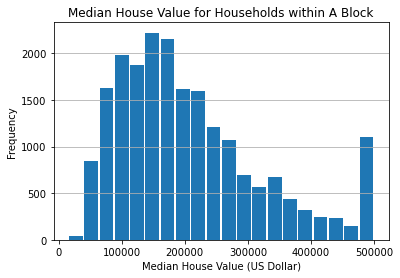

In [4]:
clean_data['median_house_value'].plot.hist(grid=True, bins=20, rwidth=0.9)
plt.title('Median House Value for Households within A Block')
plt.xlabel('Median House Value (US Dollar)')
plt.grid(axis='x', linewidth=0)

The previous graph is the histogram graph of the median house value for households within a block ($Y$). The shape of this histogram almost looks like a bell curve, so the median house value for households within a block approximately follows a normal distribution. And we can also know that this graph is right-skewed.

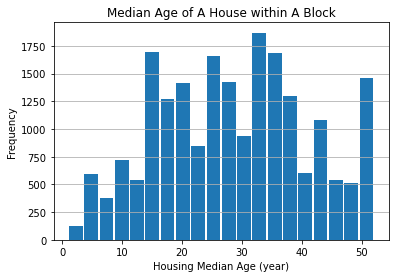

In [5]:
clean_data['housing_median_age'].plot.hist(grid=True, bins=20, rwidth=0.9)
plt.title('Median Age of A House within A Block')
plt.xlabel('Housing Median Age (year)')
plt.grid(axis='x', linewidth=0)

The previous graph is the histogram graph of the median age of a house within a block ($X_1$). The shape of this histogram almost looks like a bell curve, so the median age of a house within a block approximately follows a normal distribution. And we can also know that this graph is not skewed.

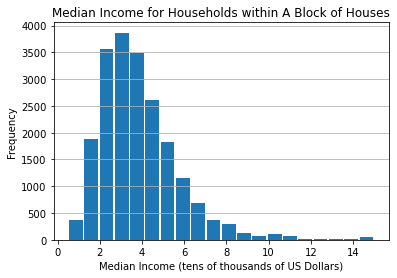

In [6]:
clean_data['median_income'].plot.hist(grid=True, bins=20, rwidth=0.9)
plt.title('Median Income for Households within A Block of Houses')
plt.xlabel('Median Income (tens of thousands of US Dollars)')
plt.grid(axis='x', linewidth=0)

The previous graph is the histogram graph of the median income for households within a block of houses ($X_2$). The shape of this histogram almost looks like a bell curve, so the median income for households within a block of houses approximately follows a normal distribution. And we can also know that this graph is right-skewed.

## Maps

In [7]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, Title
from bokeh.palettes import brewer
output_notebook()
import json

clean_data_2 = data['median_house_value']
clean_data_2 = pd.concat([clean_data_2, data['median_income']], axis=1)
clean_data_2 = pd.concat([clean_data_2, data['housing_median_age']], axis=1)
clean_data_2 = pd.concat([clean_data_2, data['longitude']], axis=1)
clean_data_2 = pd.concat([clean_data_2, data['latitude']], axis=1)
# Ignore any row with missing data
clean_data_2 = clean_data_2.dropna().reset_index(drop=True)
clean_data_2["Coordinates"] = list(zip(clean_data_2.longitude, clean_data_2.latitude))
clean_data_2["Coordinates"] = clean_data_2["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(clean_data_2,crs = 4269, geometry="Coordinates")

Loading BokehJS ...

Since we are working with the data of California housing prices, we use county as the geographic level for the maps. 

In [8]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df = state_df.query("NAME == 'California'")
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df = county_df.query("STATEFP == '06'") #Califormnia FIPS is 06

Then, we merge data. 

In [9]:
data_with_county = gpd.sjoin(gdf, county_df, how = "right", op="within")
data_with_county = data_with_county.groupby("NAME").mean().reset_index(drop=False)
clean_data_with_county = data_with_county['NAME']
clean_data_with_county = pd.concat([clean_data_with_county, 
                                    data_with_county['median_house_value']], axis=1)
clean_data_with_county = pd.concat([clean_data_with_county, 
                                    data_with_county['median_income']], axis=1)
clean_data_with_county = pd.concat([clean_data_with_county, 
                                    data_with_county['housing_median_age']], axis=1)
final_gdf = county_df.merge(clean_data_with_county, on="NAME", how="inner")

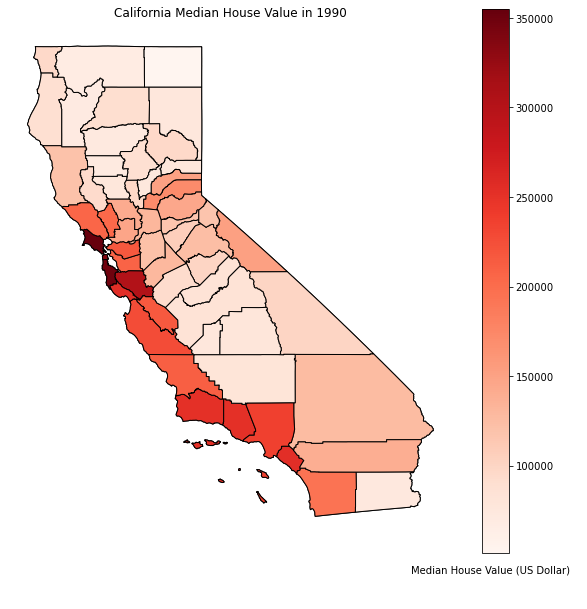

In [10]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.plot(ax=gax, edgecolor="black", color="white")
final_gdf.plot(ax=gax, edgecolor="black", column='median_house_value', 
               legend=True, cmap='Reds')
gax.set_title('California Median House Value in 1990')
gax.annotate('Median House Value (US Dollar)',xy=(0.7, 0.06),  
             xycoords='figure fraction')
plt.axis('off')
plt.show()

The previous map is a heatmap of median house value. This graph shows that median house value of the counties on the west coast is higher than median house value of the other areas. 

In [11]:
final_geojson=GeoJSONDataSource(geojson=final_gdf.to_json())
color_mapper = LinearColorMapper(palette = brewer['Reds'][6][::-1])
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, 
                     height = 20,border_line_color=None,location = (0,0), 
                     orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@NAME'), 
                              ('Median House Value (US Dollar)', 
                               '@median_house_value')])
p = figure(title="California Median House Value in 1990", tools=[hover])
p.patches("xs","ys",source=final_geojson,
          fill_color = {'field' :'median_house_value', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
p.add_layout(Title(text="Median House Value (US Dollar)", align="center"), "below")
show(p)

The previous map is a heatmap of median house value with hovers. By using hovers, we can know more information about the map. We know that the median house values of Marin, San Francisco, and San Mateo are the highest. Also, the median house value of the counties that are close to these three counties and the median house value of the counties on the west coast are higher than that of most of the inland counties.

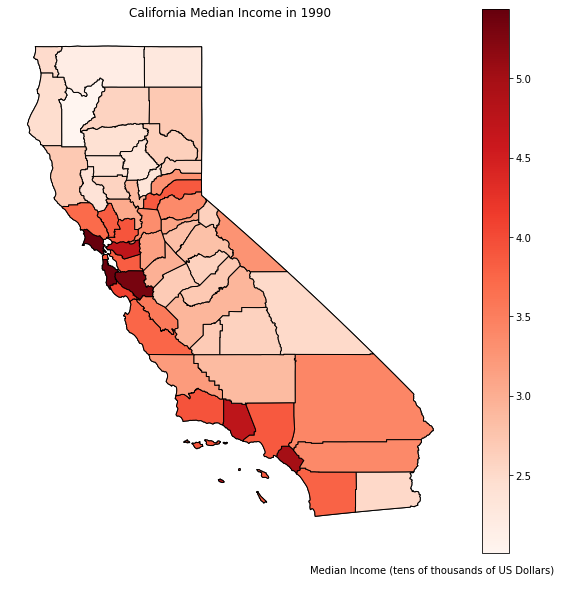

In [12]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.plot(ax=gax, edgecolor="black", color="white")
final_gdf.plot(ax=gax, edgecolor="black", column='median_income', legend=True, 
               cmap='Reds')
gax.set_title('California Median Income in 1990')
gax.annotate('Median Income (tens of thousands of US Dollars)',xy=(0.55, 0.06),  
             xycoords='figure fraction')
plt.axis('off')
plt.show()

The previous map is a heatmap of median income. This graph shows that median income of the counties on the west coast is higher than median income of the other areas. 

In [13]:
final_geojson=GeoJSONDataSource(geojson=final_gdf.to_json())
color_mapper = LinearColorMapper(palette = brewer['Reds'][6][::-1])
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, 
                     width = 500, height = 20, border_line_color=None, 
                     location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@NAME'), 
                              ('Median Income (tens of thousands of US Dollars)', 
                               '@median_income')])
p = figure(title="California Median Income in 1990", tools=[hover])
p.patches("xs","ys",source=final_geojson,
          fill_color = {'field' :'median_income', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
p.add_layout(Title(text="Median Income (tens of thousands of US Dollars)", align="center"), "below")
show(p)

The previous map is a heatmap of median income with hovers. By using hovers, we can know more information about the map. We know that the median income of Marin, San Mateo, Santa Clara, and Orange is the highest. Also, the median income of the counties that are close to those four counties and the median income of the counties on the west coast are higher than that of most of the inland counties.

# Additional Data

## County Area

### 1. Add The Data of The Area of Each County

(1) Goal: Population density is a potential predictor for the predictive model for median house value. We already have population in the dataset, and we need the area of each county in California to calculate the population density of each county in California, so the data of the area of each county could enhance the paper.

(2) We can scrape the area of each county in California from: https://en.wikipedia.org/wiki/List_of_counties_in_California

(3) We are going to merge the data by county and calculate the population density of each county in California by dividing the population by the area. Then, I will create a heatmap for the population density and compare it with the heatmap of median house value. The similarity of two maps shows the relation between two variables. If two maps look quite similar, then two variables have strong positive relation, and the population density is a good explanatory variable for the predictive model for median house value. Meanwhile, I will use the scatter plot to analysis the relation between the population density and the median house value.  

(4) Since the areas of the counties in California does not change over time, we only need to scrape the data once. We do not need to run the program over time. 

(5) We can scrape the data source and scrape the data source in the next part. 

### 2. Scrape Data

We request the web content for the "List of counties in California" webpage with the URL - 'https://en.wikipedia.org/wiki/List_of_counties_in_California'.

In [14]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

web_url = 'https://en.wikipedia.org/wiki/List_of_counties_in_California'
response = requests.get(web_url)

We use the BeautifulSoup() method to make the response content a soup object.

In [15]:
soup_object = BeautifulSoup(response.content)

We use the find_all() method to search the first table which contain the data we need.

In [16]:
data_table = soup_object.find_all('table', 'wikitable sortable')[0]

We creat a DataFrame with the column of county names and the column of the area of each county. Then, we use a for-loop to go through all the elements in the table and get the county name which is enclosed in the 'th' HTML tag and the area of each county which is enclosed in the 'td' HTML tag.

In [17]:
all_values = data_table.find_all('tr')
county_area = pd.DataFrame(columns = ['NAME', 'area'])
ix = 0
for row in all_values[1:]:
    county = row.find_all('th')[0].find('a')['title'].replace(" County, California", "")
    values = row.find_all('td')
    area = float(values[7].find_all('span')[1].text.replace(",", ""))
    
    county_area.loc[ix] = [county, area]
    ix += 1

The previous DataFrame (county_area) contains the area of each county which is what we want. 

### 3. Merge and Visualize the New Data

We first create a DataFrame containing the data of population and the corresponding location.

In [18]:
clean_data_3 = data['population']
clean_data_3 = pd.concat([clean_data_3, data['longitude']], axis=1)
clean_data_3 = pd.concat([clean_data_3, data['latitude']], axis=1)
# Ignore any row with missing data
clean_data_3 = clean_data_3.dropna().reset_index(drop=True)

We create Coordinates column and convert our DataFrame into a GeoDataFrame.

In [19]:
clean_data_3["Coordinates"] = list(zip(clean_data_3.longitude, clean_data_3.latitude))
clean_data_3["Coordinates"] = clean_data_3["Coordinates"].apply(Point)
population_gdf = gpd.GeoDataFrame(clean_data_3,crs = 4269, geometry="Coordinates")

We merge data with latitude and longitude.

In [20]:
population_with_county = gpd.sjoin(population_gdf, county_df, how = "right", op="within")
population_with_county = population_with_county.groupby("NAME").sum().reset_index(drop=False)
clean_population_with_county = population_with_county['NAME']
clean_population_with_county = pd.concat([clean_population_with_county, 
                                    population_with_county['population']], axis=1)

We create and calculate the new variable called population_density. 

In [21]:
population_density = clean_population_with_county.merge(county_area, on="NAME", how="inner")
population_density['population_density'] = population_density['population'] / population_density['area']

Then, we merge the new data to our data.

In [22]:
final_gdf = final_gdf.merge(population_density, on="NAME", how="inner")

Then, we create the maps. 

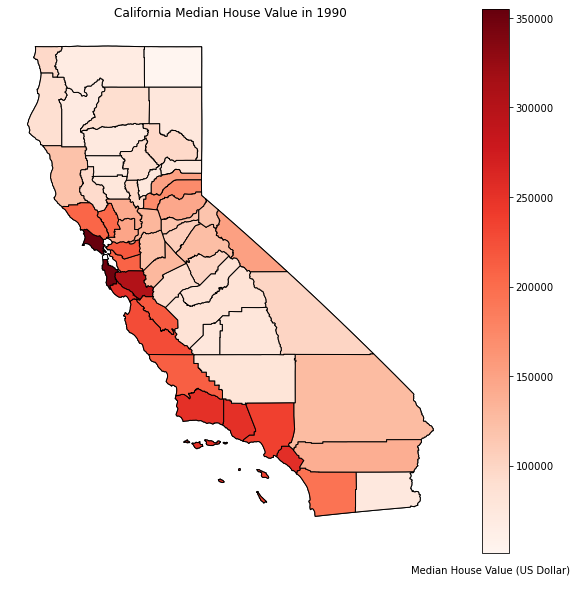

In [23]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.plot(ax=gax, edgecolor="black", color="white")
final_gdf.plot(ax=gax, edgecolor="black", column='median_house_value', 
               legend=True, cmap='Reds')
gax.set_title('California Median House Value in 1990')
gax.annotate('Median House Value (US Dollar)',xy=(0.7, 0.06),  
             xycoords='figure fraction')
plt.axis('off')
plt.show()

The previous map is a heatmap of median house value. This graph shows that median house value of the counties on the west coast is higher than median house value of the other areas. In detail, the median house value of Marin, San Francisco, and San Mateo are the highest. Also, the median house value of the counties that are close to those three counties and the median house value of the counties on the west coast are higher than that of most of the inland counties.

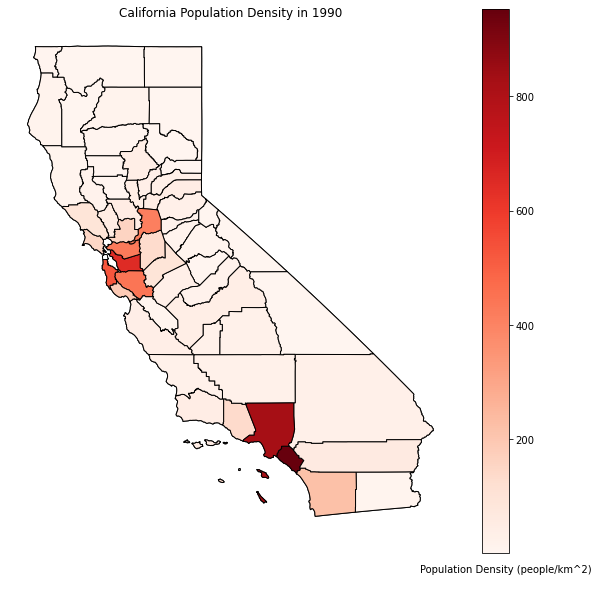

In [24]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.plot(ax=gax, edgecolor="black", color="white")
final_gdf.plot(ax=gax, edgecolor="black", column='population_density', 
               legend=True, cmap='Reds')
gax.set_title('California Population Density in 1990')
gax.annotate('Population Density (people/km^2)',xy=(0.7, 0.06),  
             xycoords='figure fraction')
plt.axis('off')
plt.show()

The previous map is a heatmap of population density. This graph shows that population density of the counties on the west coast is higher than the population density of the other areas. In detail, the population densities of Orange and Los Angeles are the highest. Since the median house value of these counties are higher than the median house value of other counties, we can conclude that the median house value of the counties with high population density is high. Thus, by comparing the maps, we know that population density is a good explanatory variable for the predictive model for median house value.

We convert our GeoDataFrame into a DataFrame. We will use this DataFrame in the OLS Regression part.

In [25]:
final_df=pd.DataFrame(final_gdf)

## Earthquake

### 1. Add The Earthquake Data

If earthquake often strike a county, then living in that county will be dangerous, so the price of the house in that county will be lower than the price of the house in the county which is not often struck by earthquake. Thus, we add the earthquake data to our dataset as a potential predictor to do the further analysis. 

We request the web content for the "List of counties in California" webpage with the URL - 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes'.

In [26]:
web_url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes'
response = requests.get(web_url)

We use the BeautifulSoup() method to make the response content a soup object.

In [27]:
soup_object = BeautifulSoup(response.content)

We use the find_all() method to search the second table which contain the data we need.

In [28]:
data_table = soup_object.find_all('table', 'wikitable')[1]

We creat a DataFrame with the column of the number of earthquakes, the column of the latitude and the column of the longitude. Then, we use a for-loop to go through all the elements in the table and get the number of earthquakes, the latitude and the longitude which are enclosed in the 'td' HTML tag. Also, we only need the data before and in 1990. 

In [29]:
all_values = data_table.find_all('tr')
earthquake_df = pd.DataFrame(columns = ['earthquake', 'latitude', 'longitude'])
ix = 0
for row in all_values[1:]:
    values = row.find_all('td')
    if int(values[0].text[:5]) <= 1990:
        earthquake = 1
        latitude = float(values[2].text)
        longitude = float(values[3].text)

        earthquake_df.loc[ix] = [earthquake, latitude, longitude]
        ix += 1
    else:
        ix += 1

The previous DataFrame (earthquake_df) contains the number and locations of earthquakes between 1969 and 1990 which are what we want.

### 2. Merge and Visualize the New Data

We create Coordinates column and convert our DataFrame into a GeoDataFrame.

In [30]:
earthquake_df["Coordinates"] = list(zip(earthquake_df.longitude, earthquake_df.latitude))
earthquake_df["Coordinates"] = earthquake_df["Coordinates"].apply(Point)
earthquake_gdf = gpd.GeoDataFrame(earthquake_df,crs = 4269, geometry="Coordinates")

We merge data with latitude and longitude

In [31]:
earthquake_with_county = gpd.sjoin(earthquake_gdf, county_df, how = "right", op="within")
earthquake_with_county = earthquake_with_county.groupby("NAME").sum().reset_index(drop=False)
clean_earthquake_with_county = earthquake_with_county['NAME']
clean_earthquake_with_county = pd.concat([clean_earthquake_with_county, earthquake_with_county['earthquake']], axis=1)

Then, we merge the new data to our data.

In [32]:
final_gdf = final_gdf.merge(clean_earthquake_with_county, on="NAME", how="inner")

Then, we create the map. 

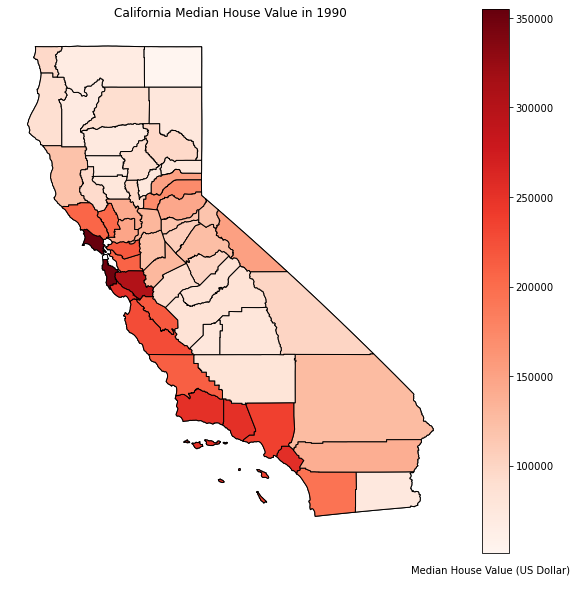

In [33]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.plot(ax=gax, edgecolor="black", color="white")
final_gdf.plot(ax=gax, edgecolor="black", column='median_house_value', 
               legend=True, cmap='Reds')
gax.set_title('California Median House Value in 1990')
gax.annotate('Median House Value (US Dollar)',xy=(0.7, 0.06),  
             xycoords='figure fraction')
plt.axis('off')
plt.show()

The previous map is a heatmap of median house value. This graph shows that median house value of the counties on the west coast is higher than median house value of the other areas. In detail, the median house value of Marin, San Francisco, and San Mateo are the highest. Also, the median house value of the counties that are close to those three counties and the median house value of the counties on the west coast are higher than that of most of the inland counties.

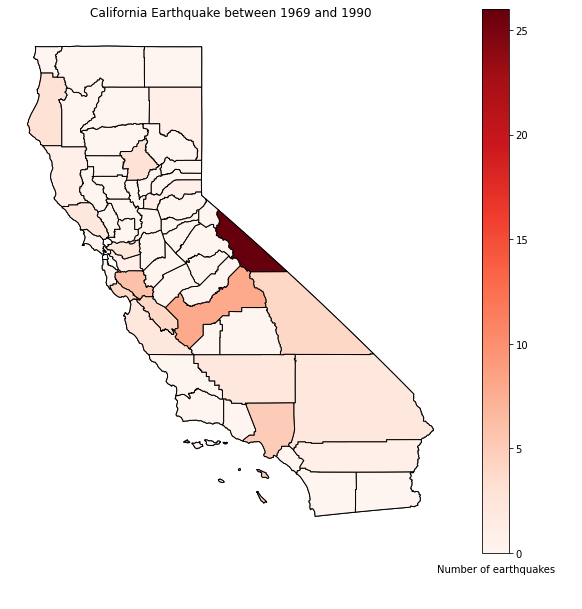

In [34]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.plot(ax=gax, edgecolor="black", color="white")
final_gdf.plot(ax=gax, edgecolor="black", column='earthquake', 
               legend=True, cmap='Reds')
gax.set_title('California Earthquake between 1969 and 1990')
gax.annotate('Number of earthquakes',xy=(0.75, 0.06),  
             xycoords='figure fraction')
plt.axis('off')
plt.show()

The previous map is a heatmap of the number of earthquakes. This graph shows that the number of earthquakes in Mono is the highest and the number of earthquakes in Santa Clara, Fresno, and Los Angeles are high. By comparing the previous two maps, we know that the median house value and the number of earthquakes do not have a relation. For example, the number of earthquakes in Mono is much higher than the other counties, but the median house value of Mono is not obviously higher or lower than the median house value of the other counties.

In [35]:
final_geojson=GeoJSONDataSource(geojson=final_gdf.to_json())
color_mapper = LinearColorMapper(palette = brewer['Reds'][9][::-1])
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, 
                     width = 500, height = 20, border_line_color=None, 
                     location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@NAME'), 
                              ('Earthquake', 
                               '@earthquake')])
p = figure(title="California Earthquake between 1969 and 1990", tools=[hover])
p.patches("xs","ys",source=final_geojson,
          fill_color = {'field' :'earthquake', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
p.add_layout(Title(text="Number of earthquakes", align="center"), "below")
show(p)

The previous map is a heatmap of the number of earthquakes with hovers. By using hovers, we can know more information about the map. We know that Mono had 26 earthquakes with magnitudes greater 5 on the Richter's scale which is much higher than the second one (Fresno: 8 earthquakes). 

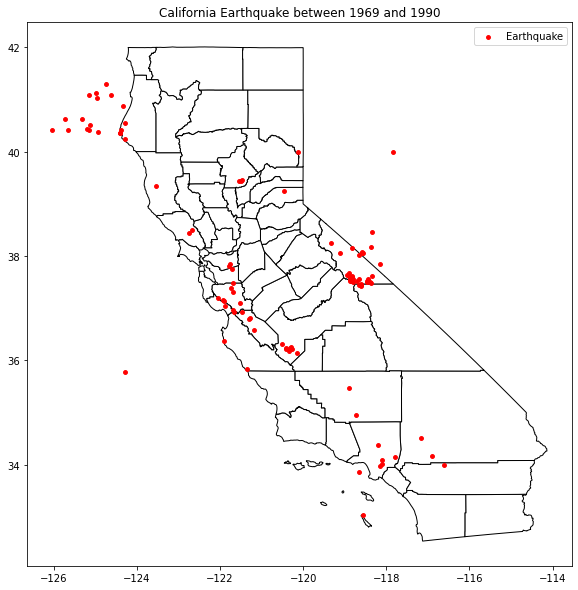

In [36]:
fig, gax = plt.subplots(figsize=(10, 10))
county_df.plot(ax=gax, edgecolor="black", color="white")
earthquake_gdf.plot(ax=gax, marker='o', color='red', markersize=15)
plt.legend(["Earthquake"])
gax.set_title('California Earthquake between 1969 and 1990')
plt.show()

The previous map is dot density map for the earthquake. This map shows that earthquakes stuck the west coast and Mono most. Since the median house value of the counties that had many earthquakes do not have the similar feature (all high or all low) and the median house value of the counties that had no earthquakes do not have the similar feature (all high or all low), we know that the number of earthquake is not a good explanatory variable for the predictive model for median house value.

# OLS Regression

To make a predictive model for California housing prices (dependent variable), we need to find good explanatory variables for the predictive model. 

Text(0.5, 1.0, 'The Relationship between Median House Value and Housing Median Age')

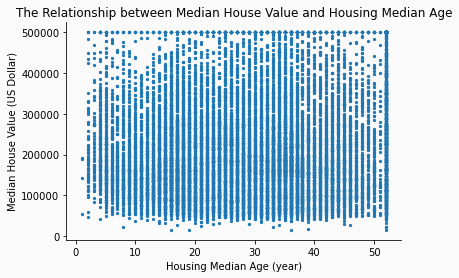

In [37]:
fig, ax = plt.subplots()
clean_data.plot(kind="scatter", x="housing_median_age", y="median_house_value", ax=ax, 
                s=5)

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0,55,10))
ax.set_xticklabels(np.arange(0,55,10))
ax.set_yticks(np.arange(0,500010,100000))
ax.set_yticklabels(np.arange(0,500010,100000))

ax.set_xlabel("Housing Median Age (year)")
ax.set_ylabel("Median House Value (US Dollar)")
ax.set_title("The Relationship between Median House Value and Housing Median Age")

By the previous graph, we cannot find a obvious linear relationship between the median house value for households within a block ($Y$) and the median age of a house within a block ($X$). 

To further study the relationship between the median house value for households within a block ($Y$) and the median age of a house within a block ($X$), we calculate the mean of the median house value of each housing age and plot the relationship between the mean of median house value and the housing median age. 

Text(0.5, 1.0, 'The Relationship between Mean of Median House Value and Housing Median Age')

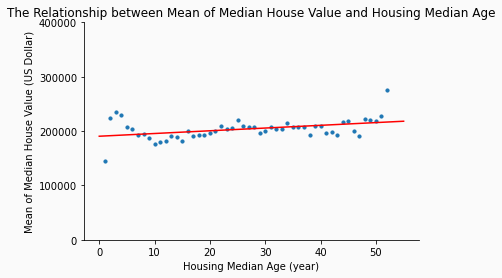

In [38]:
housing_age_data = clean_data.groupby("housing_median_age").mean().reset_index(drop=False)

fig, ax = plt.subplots()
housing_age_data.plot(kind="scatter", x="housing_median_age", y="median_house_value", ax=ax, 
                s=10)

lr = LinearRegression()
X = housing_age_data["housing_median_age"].values.reshape(-1, 1)
y = housing_age_data["median_house_value"].values.reshape(-1, 1) # the output is an array
lr.fit(X, y)
x = np.linspace(0, 55).reshape(-1, 1)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color='r')

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0,55,10))
ax.set_xticklabels(np.arange(0,55,10))
ax.set_yticks(np.arange(0,400010,100000))
ax.set_yticklabels(np.arange(0,400010,100000))

ax.set_xlabel("Housing Median Age (year)")
ax.set_ylabel("Mean of Median House Value (US Dollar)")
ax.set_title("The Relationship between Mean of Median House Value and Housing Median Age")

By the previous graph, we know that the mean of median house value for households within a block approximately has a positive linear relationship with the median age of a house within a block. As the median age of a house within a block increases, the mean of median house value for households within a block increases. 

Specifically, since the older houses generally have good locations, the price of them are higher.

Text(0.5, 1.0, 'The Relationship between Median House Value and Median Income')

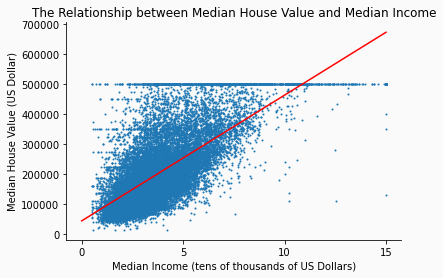

In [39]:
fig, ax = plt.subplots()
clean_data.plot(kind="scatter", x="median_income", y="median_house_value", ax=ax, s=1)

lr = LinearRegression()
X = clean_data["median_income"].values.reshape(-1, 1)
y = clean_data["median_house_value"].values.reshape(-1, 1) # the output is an array
lr.fit(X, y)
x = np.linspace(0, 15).reshape(-1, 1)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color='r')

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0,17,5))
ax.set_xticklabels(np.arange(0,17,5))
ax.set_yticks(np.arange(0,700010,100000))
ax.set_yticklabels(np.arange(0,700010,100000))

ax.set_xlabel("Median Income (tens of thousands of US Dollars)")
ax.set_ylabel("Median House Value (US Dollar)")
ax.set_title("The Relationship between Median House Value and Median Income")

By the previous graph, we know that the median house value for households within a block ($Y$) approximately has a positive linear relationship with the median income for households within a block of houses ($X$). As the median income for households within a block of houses ($X$) increases, the median house value for households within a block ($Y$) increases. 

Specifically, if the income for households increase, then people's budget to buy house will increase. So, the house value in that block will increase. 

Text(0.5, 1.0, 'The Relationship between Mean of Median House Value and Population Density')

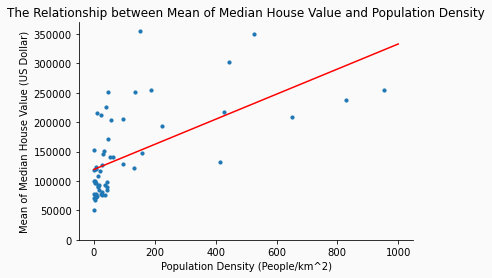

In [40]:
fig, ax = plt.subplots()
final_df.plot(kind="scatter", x="population_density", y="median_house_value", ax=ax, s=10)

lr = LinearRegression()
X = final_df["population_density"].values.reshape(-1, 1)
y = final_df["median_house_value"].values.reshape(-1, 1) # the output is an array
lr.fit(X, y)
x = np.linspace(0, 1000).reshape(-1, 1)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color='r')

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0,1100,200))
ax.set_xticklabels(np.arange(0,1100,200))
ax.set_yticks(np.arange(0,350010,50000))
ax.set_yticklabels(np.arange(0,350010,50000))

ax.set_xlabel("Population Density (People/km^2)")
ax.set_ylabel("Mean of Median House Value (US Dollar)")
ax.set_title("The Relationship between Mean of Median House Value and Population Density")

By the previous scatter plot, we know that the mean of median house value within a county($Y$) approximately has a positive linear relationship with the population density ($X$). As the population density ($X$) increases, the mean of median house value within a county ($Y$) increases. 

Specifically, if the population density of a county is high, then the demand for houses will be high, and the high demand for houses will increase the price of houses. 

By the previous projects, we choose the median income for households within a block of houses ($X_1$), the median age of a house within a block ($X_2$) and the population density ($X_3$) as the explanatory variables for the predictive model for California housing prices ($Y$). 

Since we found the linear relationships between these $X$s and $Y$ by the plots, we choose these $X$s to be in our regressions. Meanwhile, if the income for households increase, then people's budget to buy house will increase, so we think that the median income for households within a block of houses ($X_1$) can explain the median house value for households within a block ($Y$). Also, since the older houses generally have good locations, the price of them are higher. So, we think that the median age of a house within a block ($X_2$) can explain the median house value for households within a block ($Y$). In addition, if the population density of a county is high, then the demand for houses will be high, and the high demand for houses will increase the price of houses. Thus, we think that the population density ($X_3$) can explain the median house value for households within a block ($Y$).

We run 5 regressions, and the models are:
- Regression 1: $housingPrice = \beta_0 + \beta_1 income + \epsilon$
- Regression 2: $housingPrice = \beta_0 + \beta_1 age + \epsilon$
- Regression 3: $housingPrice = \beta_0 + \beta_1 populationDensity + \epsilon$
- Regression 4: $housingPrice = \beta_0 + \beta_1 income + \beta_2 age + \epsilon$
- Regression 5: $housingPrice = \beta_0 + \beta_1 income + \beta_2 age + \beta_3 income \times age + \epsilon$

## Regression 1

$$
housingPrice = \beta_0 + \beta_1 income + \epsilon
$$

By the graph "The Relationship between Median House Value and Median Income", we know that the median house value for households within a block ($Y$) approximately has a positive linear relationship with the median income for households within a block of houses ($X_1$).

Specifically, if the income for households increase, then people's budget to buy house will increase. So, the house value in that block will increase.

Thus, we choose a linear model to describe this relationship.

Then, we use Ordinary Least Squares Regression to estimate the parameters ($\beta_0$ and $\beta_1$).

In [41]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [42]:
clean_data['const'] = 1
reg1 = sm.OLS(endog=clean_data['median_house_value'], exog=clean_data[['const', 'median_income']], missing='drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:13:32   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082

By the previous result, we know that:

- The F-statistic $= 1.856*10^4 > 10$ and p-value $=0<0.05$, so all the predictors help to explain the outcome variable (reject the null hypothesis that all $\beta$s are zero).
- The R-squared $= 0.473$, so around 47.3% of variation in the median house value ($Y$) is explained by the median income ($X_1$).  
- The Adjusted R-squared $= 0.473$, and it will be used to determine whether adding additional predictors improve a regression model. 


- The intercept $\hat{\beta}_0 = 4.51*10^4$: If the income is $\$0$, then the price of house will be $\$ 45,100$. 
- The standard error of $\hat{\beta}_0$ is 1322.872, and the 95% confidence interval for $\hat{\beta}_0$ is [4.25e+04, 4.77e+04].
- For $\hat{\beta}_0$, since t-statistic $=34.082$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_0$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_0 = 0$).  


- The slope $\hat{\beta}_1 = 4.18*10^4$: If the income increase by $\$ 10,000$, then the price of house will increase by $\$ 41,800$.  
- The standard error of $\hat{\beta}_1$ is 306.806, and the 95% confidence interval for $\hat{\beta}_1$ is [4.12e+04, 4.24e+04].
- $\hat{\beta}_1$ is positive, so the median income ($X_1$) has a positive effect on the median house value ($Y$), as the graph shown.  
- For $\hat{\beta}_1$, since t-statistic $=136.223$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_1$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_1 = 0$), which implies that the effect of the median income ($X_1$) on the median house value ($Y$) is statistically significant.  


The least squares regression line is:
$$
\widehat{housingPrice} = 4.51*10^4 + 4.18*10^4 income
$$


If the income is $\$0$, then the price of house will be $\$ 45,100$. If the income increase by $\$ 10,000$, then the price of house will increase by $\$ 41,800$.  

## Regression 2

$$
housingPrice = \beta_0 + \beta_1 age + \epsilon
$$

By the graph "The Relationship between Mean of Median House Value and Housing Median Age", we know that the mean of median house value for households within a block approximately has a positive linear relationship with the median age of a house within a block.

Specifically, since the older houses generally have good locations, the price of them are higher.

Thus, we choose a linear model to describe this relationship.

Then, we use Ordinary Least Squares Regression to estimate the parameters ($\beta_0$ and $\beta_1$).

In [43]:
reg2 = sm.OLS(endog=clean_data['median_house_value'], exog=clean_data[['const', 'housing_median_age']], missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     232.8
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.76e-52
Time:                        14:13:32   Log-Likelihood:            -2.6975e+05
No. Observations:               20640   AIC:                         5.395e+05
Df Residuals:                   20638   BIC:                         5.395e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.791e+05   1985

By the previous result, we know that:

- The F-statistic $= 232.8 > 10$ and p-value $=0<0.05$, so all the predictors help to explain the outcome variable (reject the null hypothesis that all $\beta$s are zero).
- The R-squared $= 0.011$, so around 1.1% (very low) of variation in the median house value ($Y$) is explained by the median age of a house ($X_2$).  
- The Adjusted R-squared $= 0.011$, and it will be used to determine whether adding additional predictors improve a regression model or not. 


- The intercept $\hat{\beta}_0 = 1.80*10^5$: If the age of a house is 0 year, then the price of house will be $\$ 180,000$. 
- The standard error of $\hat{\beta}_0$ is 1985.416, and the 95% confidence interval for $\hat{\beta}_0$ is [1.75e+05, 1.83e+05].
- For $\hat{\beta}_0$, since t-statistic $=90.218$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_0$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_0 = 0$).  


- The slope $\hat{\beta}_1 = 968.45$: If the age of a house increase by 1 year, then the price of house will increase by $\$ 968.45$.  
- The standard error of $\hat{\beta}_1$ is 63.467, and the 95% confidence interval for $\hat{\beta}_1$ is [844.050, 1092.850].
- $\hat{\beta}_1$ is positive, so the median age of a house ($X_2$) has a positive effect on the median house value ($Y$), as the graph shown.  
- For $\hat{\beta}_1$, since t-statistic $=15.259$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_1$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_1 = 0$), which implies that the effect of the median age of a house ($X_2$) on the median house value ($Y$) is statistically significant.  


The least squares regression line is:
$$
\widehat{housingPrice} = 1.80*10^5 + 968.45 age
$$


If the age of a house is 0 year, then the price of house will be $\$ 1180,000$. If the age of a house increase by 1 year, then the price of house will increase by $\$ 968.45$. 

## Regression 3

$$
housingPrice = \beta_0 + \beta_1 populationDensity + \epsilon
$$

By the graph "The Relationship between Mean of Median House Value and Population Density", we know that the mean of median house value within a county($Y$) approximately has a positive linear relationship with the population density ($X_3$). 

Specifically, if the population density of a county is high, then the demand for houses will be high, and the high demand for houses will increase the price of houses. 

Thus, we choose a linear model to describe this relationship.

Then, we use Ordinary Least Squares Regression to estimate the parameters ($\beta_0$ and $\beta_1$).

In [44]:
final_df['const'] = 1
reg3 = sm.OLS(endog=final_df['median_house_value'], exog=final_df[['const', 'population_density']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     29.92
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.14e-06
Time:                        14:13:32   Log-Likelihood:                -707.10
No. Observations:                  57   AIC:                             1418.
Df Residuals:                      55   BIC:                             1422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.197e+05   9051

By the previous result, we know that:

- The F-statistic $= 29.92 > 10$ and p-value $=0<0.05$, so all the predictors help to explain the outcome variable (reject the null hypothesis that all $\beta$s are zero).
- The R-squared $= 0.352$, so around 35.2% of variation in the median house value ($Y$) is explained by the population density ($X_3$).  
- The Adjusted R-squared $= 0.341$, and it will be used to determine whether adding additional predictors improve a regression model. 


- The intercept $\hat{\beta}_0 = 1.20*10^5$: If the population density is 0 people per squared kilometers, then the price of house will be $\$ 120,000$. 
- The standard error of $\hat{\beta}_0$ is 9051.360, and the 95% confidence interval for $\hat{\beta}_0$ is [1.02e+05, 1.38e+05].
- For $\hat{\beta}_0$, since t-statistic $=13.227$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_0$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_0 = 0$).  


- The slope $\hat{\beta}_1 = 213.46$: If the population density increase by 1 person per squared kilometers, then the price of house will increase by $\$ 213.46$.  
- The standard error of $\hat{\beta}_1$ is 39.026, and the 95% confidence interval for $\hat{\beta}_1$ is [135.254, 291.674].
- $\hat{\beta}_1$ is positive, so the population density ($X_3$) has a positive effect on the median house value ($Y$), as the graph shown.  
- For $\hat{\beta}_1$, since t-statistic $=5.470$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_1$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_1 = 0$), which implies that the effect of the population density ($X_3$) on the median house value ($Y$) is statistically significant.  


The least squares regression line is:
$$
\widehat{housingPrice} = 1.20*10^5 + 213.46 populationDensity
$$


If the population density is 0 people per squared kilometers, then the price of house will be $\$ 120,000$. If the population density increase by 1 person per squared kilometers, then the price of house will increase by $\$ 213.46$.

## Regression 4

$$
housingPrice = \beta_0 + \beta_1 income + \beta_2 age + \epsilon
$$

By the graph "The Relationship between Median House Value and Median Income", we know that the median house value for households within a block ($Y$) approximately has a positive linear relationship with the median income for households within a block of houses ($X_1$).

Specifically, if the income for households increase, then people's budget to buy house will increase. So, the house value in that block will increase.

By the graph "The Relationship between Mean of Median House Value and Housing Median Age", we know that the mean of median house value for households within a block approximately has a positive linear relationship with the median age of a house within a block.

Specifically, since the older houses generally have good locations, the price of them are higher.

Since both the median income for households within a block of houses ($X_1$) and the median age of a house within a block ($X_2$) have a linear relationship with the median house value for households within a block ($Y$), we choose a multivariate linear model to describe this relationship.

Then, we use Ordinary Least Squares Regression to estimate the parameters ($\beta_0$, $\beta_1$ and $\beta_2$).

In [45]:
reg4 = sm.OLS(endog=clean_data['median_house_value'], exog=clean_data[['const', 'median_income', 
                                                                       'housing_median_age']], missing='drop')
results4 = reg4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.070e+04
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:13:32   Log-Likelihood:            -2.6253e+05
No. Observations:               20640   AIC:                         5.251e+05
Df Residuals:                   20637   BIC:                         5.251e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.019e+04   1915

By the previous result, we know that:

- The F-statistic $= 1.070*10^4 > 10$ and p-value $=0<0.05$, so all the predictors help to explain the outcome variable (reject the null hypothesis that all $\beta$s are zero).
- The R-squared $= 0.509$, so around 50.9% of variation in the median house value ($Y$) is explained by the median income ($X_1$) and the median age of a house ($X_2$).  
- The Adjusted R-squared $= 0.509$. When we compare Regression 4 with Regression 1, we know that the median age of a house ($X_2$) contributes to explaining the median house value ($Y$) because the adjusted R-squared of Regression 4 is higher than the adjusted R-squared of Regression 1 ($0.509 > 0.473$). When we compare Regression 4 with Regression 2, we know that the median income ($X_1$) contributes to explaining the median house value ($Y$) because the adjusted R-squared of Regression 4 is higher than the adjusted R-squared of Regression 1 ($0.509 > 0.011$). 


- The intercept $\hat{\beta}_0 = -1.02*10^4$: If the income is $\$0$ and the age of a house is 0 year, then the price of house will be $\$ -10,200$. 
- The standard error of $\hat{\beta}_0$ is 1915.411, and the 95% confidence interval for $\hat{\beta}_0$ is [-1.39e+04, -6434.677].
- For $\hat{\beta}_0$, since t-statistic $=-5.320$ and $|-5.320|$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_0$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_0 = 0$).  


- $\hat{\beta}_1 = 4.32*10^4$: If the income increase by $\$ 10,000$, then the price of house will increase by $\$ 43,200$.  
- The standard error of $\hat{\beta}_1$ is 298.359, and the 95% confidence interval for $\hat{\beta}_0$ is [4.26e+04, 4.38e+04].
- $\hat{\beta}_1$ is positive, so the median income ($X_1$) has a positive effect on the median house value ($Y$), as the graph shown.  
- For $\hat{\beta}_1$, since t-statistic $=144.689$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_1$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_1 = 0$), which implies that the effect of the median income ($X_1$) on the median house value ($Y$) is statistically significant.  


- $\hat{\beta}_2 = 1744.13$: If the age of a house increase by 1 year, then the price of house will increase by $\$ 1744.13$.  
- The standard error of $\hat{\beta}_2$ is 45.038, and the 95% confidence interval for $\hat{\beta}_2$ is [1655.856, 1832.413].
- $\hat{\beta}_2$ is positive, so the median age of a house ($X_2$) has a positive effect on the median house value ($Y$), as the graph shown.  
- For $\hat{\beta}_2$, since t-statistic $=38.726$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_2$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_2 = 0$), which implies that the effect of the median age of a house ($X_2$) on the median house value ($Y$) is statistically significant.  


The least squares regression line is:
$$
\widehat{housingPrice} = -1.02*10^4 + 4.32*10^4 income + 1744.13 age
$$


If the income is $\$0$ and the age of a house is 0 year, then the price of house will be $\$ -10,200$. If the income increase by $\$ 10,000$, then the price of house will increase by $\$ 43,200$. If the age of a house increase by 1 year, then the price of house will increase by $\$ 1744.13$. 

## Regression 5

$$
housingPrice = \beta_0 + \beta_1 income + \beta_2 age + \beta_3 income \times age + \epsilon
$$

By the graph "The Relationship between Median House Value and Median Income", we know that the median house value for households within a block ($Y$) approximately has a positive linear relationship with the median income for households within a block of houses ($X_1$).

Specifically, if the income for households increase, then people's budget to buy house will increase. So, the house value in that block will increase.

By the graph "The Relationship between Mean of Median House Value and Housing Median Age", we know that the mean of median house value for households within a block approximately has a positive linear relationship with the median age of a house within a block.

Specifically, since the older houses generally have good locations, the price of them are higher.

Since both the median income for households within a block of houses ($X_1$) and the median age of a house within a block ($X_2$) have a linear relationship with the median house value for households within a block ($Y$), we choose a multivariate linear model to describe this relationship in Regression 4. The linear model of regression 4 assumed that the effect on the median house value ($Y$) of the median income ($X_1$) is independent of the median age of a house ($X_2$). Regression 5 does not have this assumption, so we choose a multivariate linear model with an interaction term to describe the relationship between the dependent variable ($Y$) and independent variables ($X$s). 

Then, we use Ordinary Least Squares Regression to estimate the parameters ($\beta_0$, $\beta_1$, $\beta_2$ and $\beta_3$).

In [46]:
clean_data['income_times_age'] = clean_data['median_income'] * clean_data['housing_median_age']
reg5 = sm.OLS(endog=clean_data['median_house_value'], exog=clean_data[['const', 'median_income', 
                                                                       'housing_median_age', 'income_times_age']], 
              missing='drop')
results5 = reg5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7152.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:13:32   Log-Likelihood:            -2.6251e+05
No. Observations:               20640   AIC:                         5.250e+05
Df Residuals:                   20636   BIC:                         5.251e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3190.4797   3259

By the previous result, we know that:

- The F-statistic $= 7152 > 10$ and p-value $=0<0.05$, so all the predictors help to explain the outcome variable (reject the null hypothesis that all $\beta$s are zero).
- The R-squared $= 0.51$, so around 51% of variation in the median house value ($Y$) is explained by the median income ($X_1$), the median age of a house ($X_2$) and the interaction of the median income and the median age of a house ($X_1 \times X_2$).  
- The Adjusted R-squared $= 0.51$. When we compare Regression 5 with Regression 4, we know that the interaction of the median income and the median age of a house ($X_1 \times X_2$) contributes to explaining the median house value ($Y$) because the adjusted R-squared of Regression 5 is higher than the adjusted R-squared of Regression 4 ($0.51 > 0.509$).


- The intercept $\hat{\beta}_0 = 0$: If the income is $\$0$ and the age of a house is 0 year, then the price of house will be $\$ 0$.
- For $\hat{\beta}_0$, since t-statistic $=0.979$ is not larger than critical value of 2.5%, p-value $= 0.328 > 0.05$. So, $\hat{\beta}_0$ is not significantly different from 0 and we have a strong evidence for the null hypothesis $\hat{\beta}_0 = 0$.  


- $\hat{\beta}_1 = 3.99*10^4$
- The standard error of $\hat{\beta}_1$ is 711.277, and the 95% confidence interval for $\hat{\beta}_0$ is [3.85e+04, 4.13e+04].  
- For $\hat{\beta}_1$, since t-statistic $=711.277$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_1$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_1 = 0$), which implies that the effect of the median income ($X_1$) on the median house value ($Y$) is statistically significant.  


- $\hat{\beta}_2 = 1293.55$
- The standard error of $\hat{\beta}_2$ is 99.605, and the 95% confidence interval for $\hat{\beta}_2$ is [1098.316, 1488.785].
- For $\hat{\beta}_2$, since t-statistic $=12.987$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_2$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_2 = 0$), which implies that the effect of the median age of a house ($X_2$) on the median house value ($Y$) is statistically significant.  


- $\hat{\beta}_3 = 112.95$ 
- The standard error of $\hat{\beta}_1$ is 22.275, and the 95% confidence interval for $\hat{\beta}_0$ is [69.295, 156.615].
- For $\hat{\beta}_3$, since t-statistic $=5.071$ is larger than critical value of 2.5%, p-value $= 0 < 0.05$. So, $\hat{\beta}_3$ is significantly different from 0 (reject the null hypothesis of $\hat{\beta}_3 = 0$), which implies that the effect of the interaction of the median income and the median age of a house ($X_1 \times X_2$) on the median house value ($Y$) is statistically significant. 


- If the income increase by $\$ 10,000$, then the price of house will increase by $\$ 39,900 + 112.95 age$.
- If the age of a house increase by 1 year, then the price of house will increase by $\$ 1293.55 + 112.95 income$.  


- $\hat{\beta}_1$ and $\hat{\beta}_3$ are positive ($X_2$ is also positive), so the median income ($X_1$) has a positive effect on the median house value ($Y$).
- $\hat{\beta}_2$ and $\hat{\beta}_3$ are positive ($X_1$ is also positive), so the median age of a house ($X_2$) has a positive effect on the median house value ($Y$).  


The least squares regression line is:
$$
\widehat{housingPrice} = 3.99*10^4 income + 1293.55 age + 112.95 income \times age
$$


If the income is $\$0$ and the age of a house is 0 year, then the price of house will be $\$ 0$. If the income increase by $\$ 10,000$, then the price of house will increase by $\$ 39,900 + 112.95 age$.If the age of a house increase by 1 year, then the price of house will increase by $\$ 1293.55 + 112.95 income$.  

## Analysis

Now, we have five least squares regression lines:


- Regression 1: $\widehat{housingPrice} = 4.51*10^4 + 4.18*10^4 income$ (R-squared: 0.473 , Adjusted R-squared: 0.473)


- Regression 2: $\widehat{housingPrice} = 1.80*10^5 + 968.45 age$ (R-squared: 0.011 , Adjusted R-squared: 0.011)


- Regression 3: $\widehat{housingPrice} = 1.20*10^5 + 213.46 populationDensity$ (R-squared: 0.352, Adjusted R-squared: 0.341)


- Regression 4: $\widehat{housingPrice} = -1.02*10^4 + 4.32*10^4 income + 1744.13 age$ (R-squared: 0.509 , Adjusted R-squared: 0.509)


- Regression 5: $\widehat{housingPrice} = 3.99*10^4 income + 1293.55 age + 112.95 income \times age$ (R-squared: 0.510 , Adjusted R-squared: 0.510)

We prefer regression 5: $\widehat{housingPrice} = 3.99*10^4 income + 1293.55 age + 112.95 income \times age$ because:

1. When we compare Regression 4 with Regression 1, we know that the median age of a house ($X_2$) contributes to explaining the median house value ($Y$) because the adjusted R-squared of Regression 4 is higher than the adjusted R-squared of Regression 1 ($0.509 > 0.473$). When we compare Regression 4 with Regression 2, we know that the median income ($X_1$) contributes to explaining the median house value ($Y$) because the adjusted R-squared of Regression 4 is higher than the adjusted R-squared of Regression 1 ($0.509 > 0.011$). 

2. When we compare Regression 5 with Regression 4, we know that the interaction of the median income and the median age of a house ($X_1 \times X_2$) contributes to explaining the median house value ($Y$) because the adjusted R-squared of Regression 5 is higher than the adjusted R-squared of Regression 4 ($0.51 > 0.509$).

3. The R-squared of Regression 5 is the highest, so Regression 5 explain the most variation in the median house value ($Y$). 

The goal of this project is  making a predictive model for the California housing prices. Regression 5 is a predictive model for the California housing prices, so it can help us to fulfill the research goal. 

# Machine Learning

The objective function is:
$$
\min\sum_{i=1}^n (y_i- \hat{y}_i)^2
$$


We want to minimize the Sum of Squared Residuals (RSS). (MSE is minimized at the same time, since MSE $= \frac{1}{n}\sum_{i=1}^n (y_i- \hat{y}_i)^2 = \frac{1}{n}$RSS.) Minimizing the Sum of Squared Residuals (RSS) means that we minimize the sum of squared error terms. 


The regularization parameter controls the trade-off between the complexity of the tree and how well the model fits the sample data. If the regularization parameter is higher, then there is a larger penalty for having a complex tree. If the regularization tree is 0, then we get the largest tree which is non-regularized. 

By the graph "The Relationship between Median House Value and Median Income", we know that the median house value for households within a block ($Y$) approximately has a positive linear relationship with the median income for households within a block of houses ($X_1$).

Specifically, if the income for households increase, then people's budget to buy house will increase. So, the house value in that block will increase.

By the graph "The Relationship between Mean of Median House Value and Housing Median Age", we know that the mean of median house value for households within a block approximately has a positive linear relationship with the median age of a house within a block.

Specifically, since the older houses generally have good locations, the price of them are higher.

Since both the median income for households within a block of houses ($X_1$) and the median age of a house within a block ($X_2$) have a linear relationship with the median house value for households within a block ($Y$), we choose the median income for households within a block of houses ($X_1$) and the median age of a house within a block ($X_2$) as independent variables in the model.

Then, we run the regression tree using the median income for households within a block of houses ($X_1$) and the median age of a house within a block ($X_2$). 

In [47]:
from sklearn import tree
from sklearn import metrics

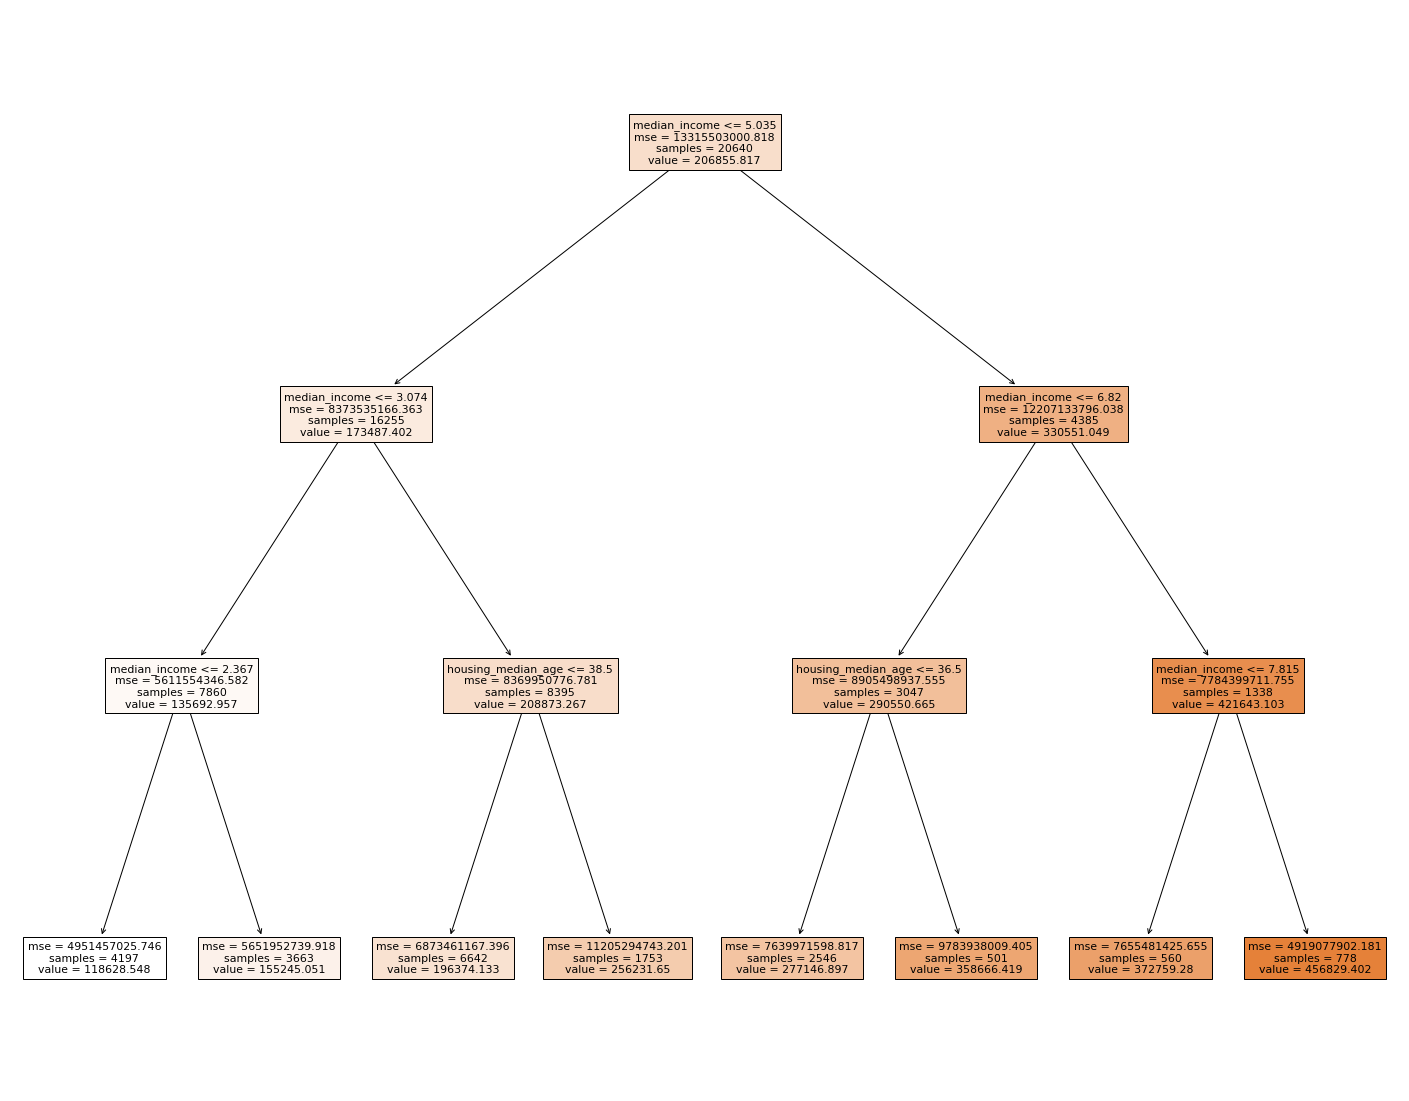

In [48]:
X = clean_data[['median_income', 'housing_median_age']].copy()
y = clean_data['median_house_value']
housing_price_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
y_pred_tree = housing_price_tree.predict(X)
mse_tree = metrics.mean_squared_error(y, y_pred_tree)
housing_price_fig = plt.figure(figsize=(25,20))
housing_price_fig = tree.plot_tree(housing_price_tree, feature_names=X.columns, filled=True)

The previous graph is the regression tree for predicting the California housing prices ($Y$), based on the median income for households ($X_1$) and the median age of a house ($X_2$) in 1990. The previous regression tree has 7 internal nodes and 8 leaves. On each internal node, the label of form $X_i <= x_i$ shows that the left-hand branch satisfy the label ($X_i <= x_i$) and the right-hand branch does not satisfy the label ($X_i > x_i$). For example, the label of the root is median_income $<= 5.035$. It shows that the left-hand branch corresponds to median_income $<= 5.035$ and the right-hand branch corresponds to median_income $> 5.035$. 

In [49]:
y_pred_linear = results5.predict(clean_data[['const', 'median_income', 'housing_median_age', 'income_times_age']])
mse_linear = metrics.mean_squared_error(y, y_pred_linear)

In [50]:
print('Mean Squared Error of Regression Tree:', mse_tree)

Mean Squared Error of Regression Tree: 6746512190.969691


The Mean Squared Error of the Regression Tree is $6.75 * 10^9$. 

In [51]:
print('Mean Squared Error of Regreesion 5:', mse_linear)

Mean Squared Error of Regreesion 5: 6528184654.312322


The Mean Squared Error of Regression 5 is $6.53 * 10^9$. 

In [52]:
print('Mean Squared Error of Regression Tree is higher than Mean Squared Error of Regreesion 5:', 
      mse_tree > mse_linear)

Mean Squared Error of Regression Tree is higher than Mean Squared Error of Regreesion 5: True


Since the MSE of the linear regression model we found before is less than the MSE of the Regression Tree, we know that the performance of the linear regression model we found before (Regression 5) is better than the performance of the Regression Tree. 


Comparing with OLS, we know that Regression Tree is easier to explain, follow how human make decisions, and can be displayed graphically. 

# Conclusion

In summary, we get the mean, standard deviation, and quantiles of the median house value for households within a block, the median age of a house within a block, and the median income for households within a block of houses by analyzing 20640 rows of data. By analysis the histograms, we know that the median house value for households within a block approximately follows a right-skewed normal distribution, the median age of a house within a block approximately follows a normal distribution, and the median income for households within a block of houses approximately follows a right-skewed normal distribution. By plotting the relation between $Y$ and different $X$s, we know that the median house value for households within a block approximately has a positive linear relationship with the median age of a house within a block and the median income for households within a block of houses.

The map of median house value and the map of median income are quite similar, so they show that median house value and median income have strong positive relation, which is same as what we learned from the scatter plot of median house value and median income. In detail, the median house value and median income of the counties on the west coast are higher than that of other areas. Although the colors of some counties are not exactly same in two maps, the colors of the same county in two maps are similar, so there is no obvious outlier location. In summary, the maps show that median house value and median income have strong positive relation, so median income is a good explanatory variable for the predictive model for median house value.

After adding the new data of the county area and earthquake, we successfully improve the predictive model for median house value. By comparing the maps of the median house value and the population density, we know that the median house value of the counties with high population density is high. By the scatter plot of the mean of median house value and the population density, we know that the mean of median house value within a county approximately has a positive linear relationship with the population density. Therefore, we can conclude population density is a good explanatory variable for the predictive model for median house value. Meanwhile, since the maps of the median house value and the earthquakes stuck California are quite different, we can conclude that the number of earthquakes is not a good explanatory variable for the predictive model for median house value.

After we use the data of median house value, median age of a house, median income, population density to run the OLS Regression, we choose $\widehat{housingPrice} = 3.99*10^4 income + 1293.55 housingAge + 112.95 income \times housingAge$ as the predictive model for the California housing prices since this regression model has the highest R-squared (this regression model explains the most variation in the median house value) and the Adjusted R-squared increases when I add additional predictors (adding additional predictors improves a regression model). By comparing the Mean Squared Error of this regression model with the Mean Squared Error of the Regression Tree, we still prefer $\widehat{housingPrice} = 3.99*10^4 income + 1293.55 housingAge + 112.95 income \times housingAge$ because the MSE of this regression model is lower than the MSE of the Regression Tree. 

Therefore, we can use the predictive model $\widehat{housingPrice} = 3.99*10^4 income + 1293.55 housingAge + 112.95 income \times housingAge$ to predict the California housing prices (the unit of housing price is $\$ 1$, and the unit of income is $\$ 10,000$). 

# Future Work

- I would like to collect the data for each block's area. Then, I can use the data to calculate the population density of each block, so we can use the population density of each block and the median house value for households within a block to run the regression model. This means that we a larger sample size when we run the regression, since the number of blocks in California is much higher than the number of counties in California. A higher sample size increases the accuracy of the regression model. 

- I would like to collect the data of the California housing price in the recent years. Then, I can use the data to make predictions on the California housing price in the future year, such as 2022.

# References

- "California Housing Prices" Kaggle, https://www.kaggle.com/camnugent/california-housing-prices
- "List of Counties in California" Wikipedia, https://en.wikipedia.org/wiki/List-of-counties-in-California
- "SOCR Data 021708 Earthquakes" SOCR, http://wiki.stat.ucla.edu/socr/index.php/SOCR-Data-021708-Earthquakes
- Farhoodi, Abdollah. "Regression Tree Slides." ECO225: Data Tools for Economists, April 2021. 
- Clark, David E., and William E. Herrin. "The Impact of Public School Attributes on Home Sale Prices in California." Growth and Change, Jan. 2000.